<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Assignment - Part 1: Analyzing wildfire activities in Australia** 

Estimated time needed: **40** minutes


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
    </li>
    <li>
        <a href="#Dataset">Dataset</a>
    </li>
    <li><a href="#Importing Dataset">Importing Dataset</a></li>
    <li><a href="#Practice Tasks">Practice Tasks</a></li>
   


---


# Objectives

After completing this lab you will be able to:

 - Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts 


---


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\ProgramData\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\ProgramData\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\ProgramData\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\ProgramData\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


In [2]:
%pip install seaborn
%pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [ ]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)
print('Data read into a pandas dataframe!')


In [2]:
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

Let's look at some samples rows from the dataset we loaded:


In [3]:
df.head(30)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R


---


Let's verify the column names and the data type of each variable


In [4]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


**Verify the columns again**


In [7]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

<details>
    <summary>Click here for Solution</summary>

```python
    df.dtypes
```

</details>


---


## Practice Tasks


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


<details>
    <summary>Click here for a Hint</summary>
You will be required to group the year for 'Estimated_fire_area' (taking its mean)<br>Then use df.plot() on it to create a line graph

</details>


In [91]:
# TODO
dftest1 = df.iloc[26:50]
dftest1

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
26,NSW,2/1/2005,6.586667,319.383333,40.100000,81.000000,2.645751,7.000000,3,R,2005,2
27,NSW,2/3/2005,3.200000,304.733333,28.366667,92.333333,8.020806,64.333333,3,R,2005,2
28,NSW,2/4/2005,7.505714,329.021429,34.142857,83.285714,5.313953,28.238095,7,R,2005,2
29,NSW,2/5/2005,25.689091,321.418182,61.272727,84.818182,8.600211,73.963636,11,R,2005,2
30,NSW,2/6/2005,14.430000,333.750000,84.600000,92.100000,8.659613,74.988889,10,R,2005,2
31,NSW,2/7/2005,20.915000,327.058333,51.975000,84.083333,7.140898,50.992424,12,R,2005,2
32,NSW,2/8/2005,12.086667,331.161111,180.366667,94.888889,7.025746,49.361111,9,R,2005,2
33,NSW,2/10/2005,10.642500,305.512500,19.862500,88.250000,8.811518,77.642857,8,R,2005,2
34,NSW,2/11/2005,10.986667,332.705556,72.388889,90.666667,7.952987,63.250000,9,R,2005,2
35,NSW,2/12/2005,11.963333,321.522222,67.211111,89.000000,9.733961,94.750000,9,R,2005,2


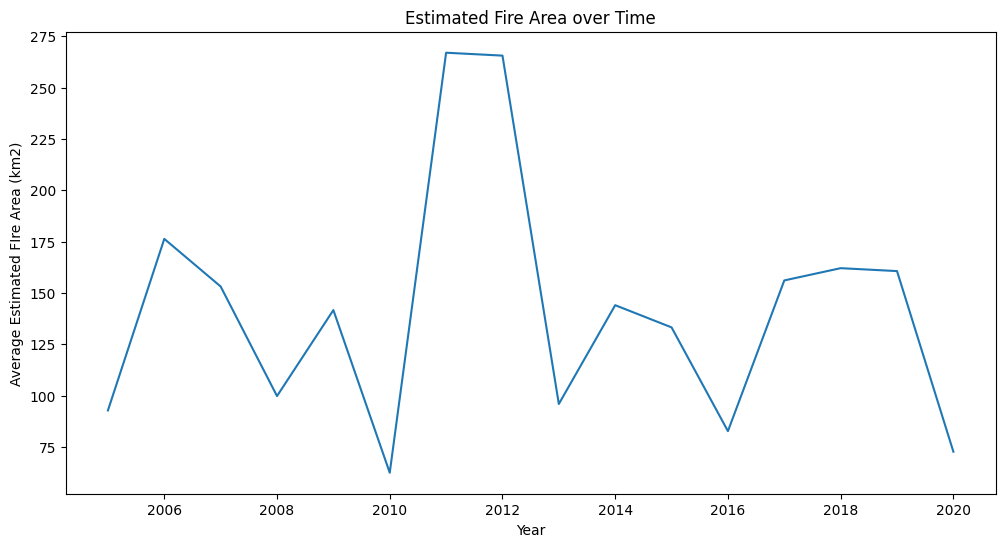

In [8]:
df_new=df.groupby('Year')['Estimated_fire_area'].mean()
plt.figure(figsize=(12,6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated FIre Area (km2)')
plt.title('Estimated Fire Area over Time')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
    plt.figure(figsize=(12, 6))
    df_new=df.groupby('Year')['Estimated_fire_area'].mean()
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()
```

</details>


---


### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


<details>
    <summary>Click here for a Hint</summary>
You will be required to group the year and month for 'Estimated_fire_area' (taking its mean)<br>Then use df.plot() on it to create a line graph

</details>


In [94]:
# TODO
df_new1 = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new1.iloc[0:12]

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
      6         53.008088
      7         68.894702
      8         85.339337
      9        114.282408
      10       177.676820
      11       163.266122
      12       111.906784
Name: Estimated_fire_area, dtype: float64

In [10]:
df_new=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

<details>
    <summary>Click here for Solution</summary>

```python
    df_new=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year, Month')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()
```

</details>


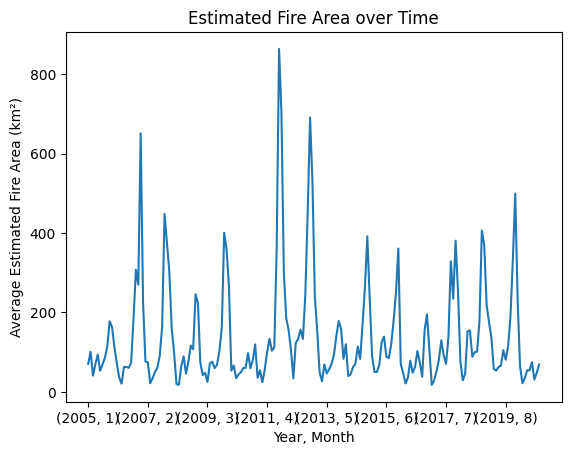

In [11]:
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)


In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [15]:
df_new1

Region
NSW    315.526218
NT     322.898453
QL     318.364434
SA     321.497609
TA     313.368483
VI     315.029792
WA     324.142246
Name: Mean_estimated_fire_brightness, dtype: float64

<details>
    <summary>Click here for a Hint</summary>
you need to plot reions on x-axis and the 'Mean_estimated_fire_brightness' on y-axis.<br>Title it as 'Distribution of Mean Estimated Fire Brightness across Regions'
</details>


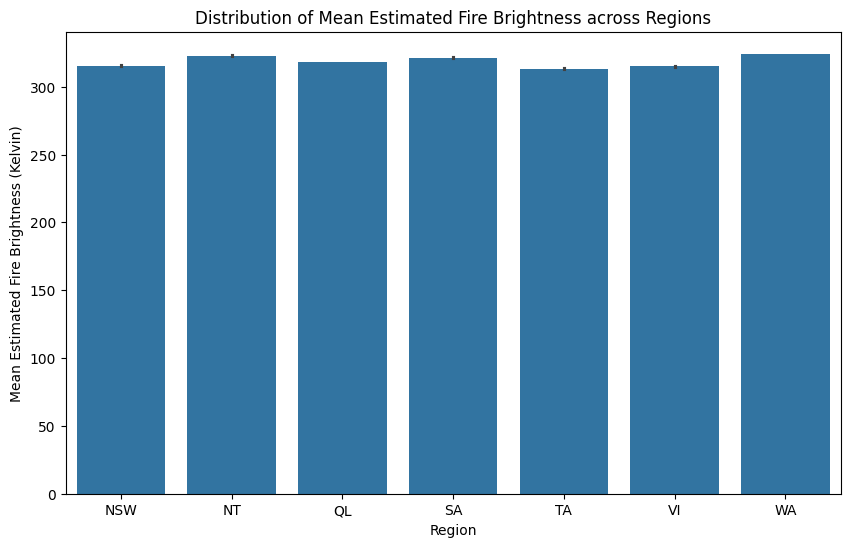

In [22]:
#TODO
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()
```
</details>


---


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


<details>
    <summary>Click here for a Hint</summary>
First you will  be required to group the data on region and find the sum of count
</details>


In [29]:
df.head()
df_new2 = df.groupby('Region')['Count'].sum()
df_new2

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

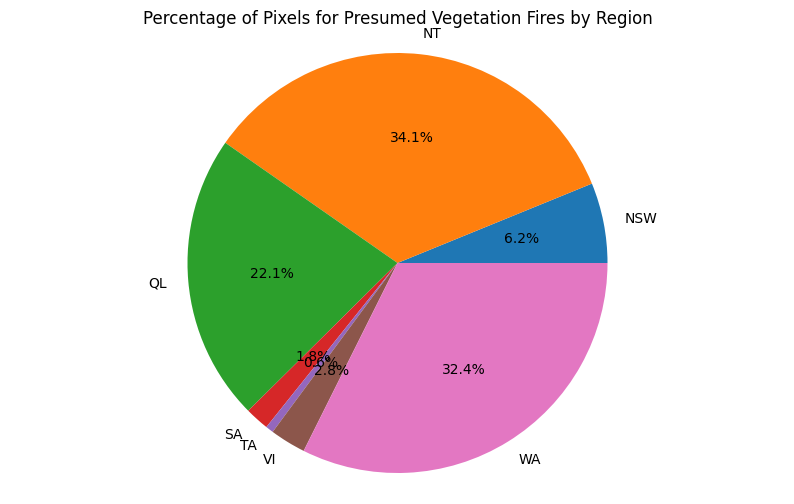

In [31]:
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

In [35]:
region_counts

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

<details>
    <summary>Click here for Solution</summary>

```python
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()
```
</details>


### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


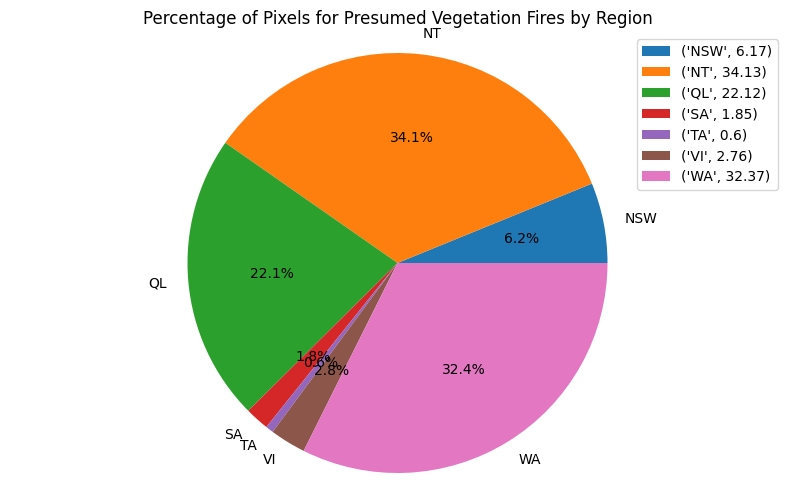

In [41]:
#TODO
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

---


### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


<details>
    <summary>Click here for a Hint</summary>
    Call plt.hist() and pass df['Mean_estimated_fire_brightness'] as x
</details>


In [42]:
#TODO
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


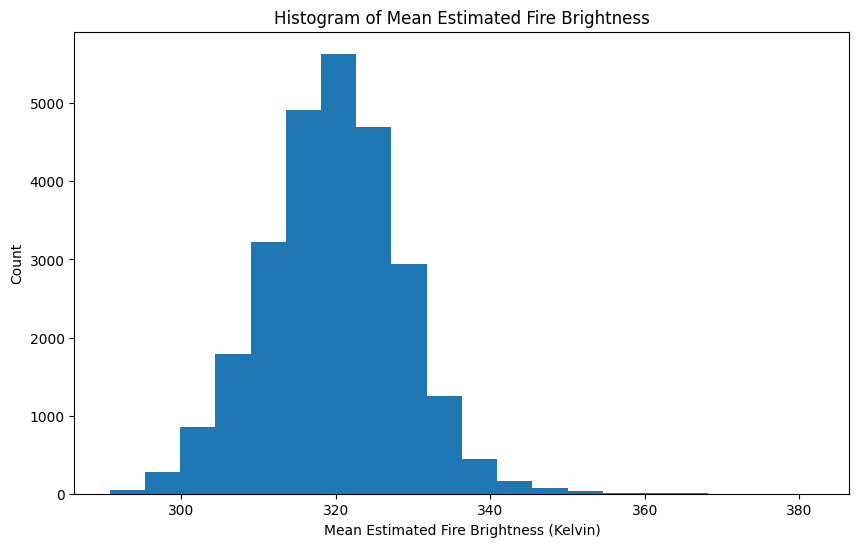

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()
```
</details>


### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


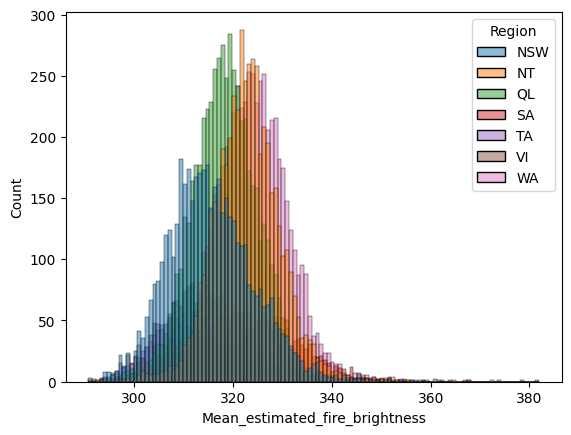

In [47]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()
```
</details>


### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


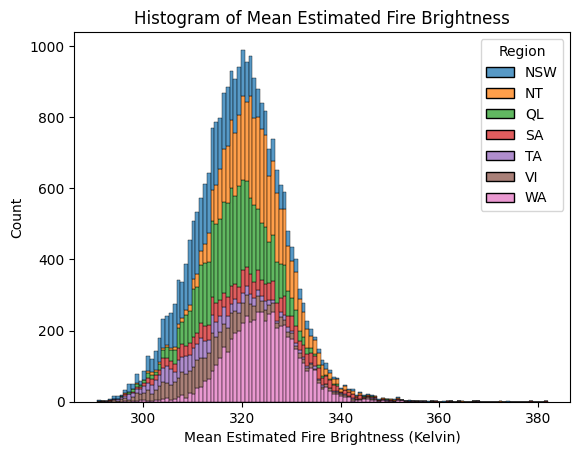

In [50]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()
```
</details>


---


### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


<details>
    <summary>Click here for a Hint</summary>
    Call plt.scatter() <br> or use the sns.scatterplot()
</details>


In [52]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


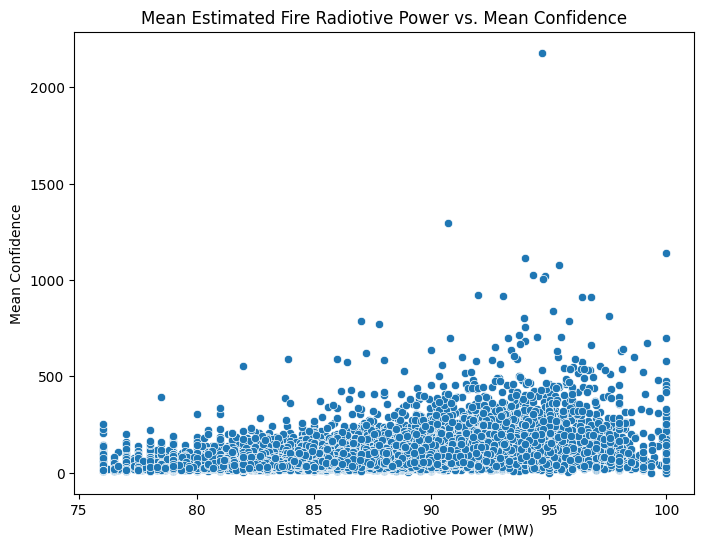

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated FIre Radiotive Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiotive Power vs. Mean Confidence')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
    plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
    plt.ylabel('Mean Confidence')
    plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
    plt.show()
```
</details>


---


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [59]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [61]:
aus_reg = folium.map.FeatureGroup()

Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
    folium.features.CircleMarker(
    [lat, lng],
    popup=lab,
    radius=5,
    color='red',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6
    )
    )
    
Aus_map.add_child(aus_reg)

<details>
    <summary>Click here for Solution</summary>

```python
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)
```
</details>


---


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-06-281|0.2|Dr. Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|


Copyright © 2023 IBM Corporation. All rights reserved.
